In [1]:
# from mylab import *
from deepar.dataset.time_series import MockTs
from deepar.dataset.time_series import TimeSeries
from deepar.model.lstm import DeepAR


%matplotlib inline
from numpy.random import normal
import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [34]:
rul_df = pd.read_csv("./output/result_RUL_20200423.csv")
rul_df.reset_index(inplace = True)
rul_df = rul_df.astype(int)
print(rul_df.shape)
rul_df.head()

(61, 8)


,index,num,RUL,RUL_mu,RUL_upper,RUL_lower,RUL_2upper,RUL_2lower
0,0,250,50,63,52,72,40,80
1,1,251,49,58,47,67,35,75
2,2,252,48,53,42,62,30,70
3,3,253,47,50,39,59,26,66
4,4,254,46,45,34,54,22,62


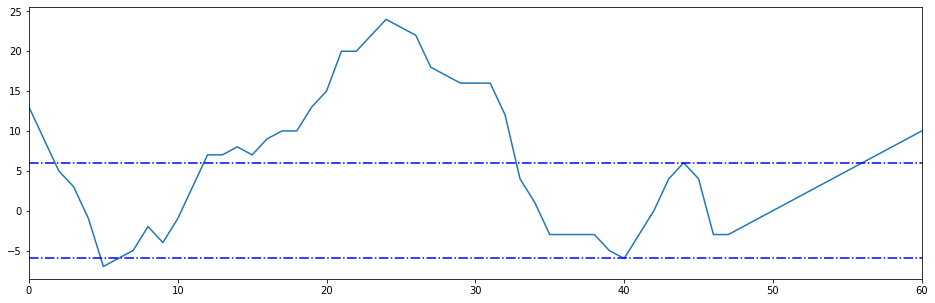

In [6]:
rul_df["err"] = rul_df["RUL_mu"] - rul_df["RUL"] 
plt.figure(figsize = (16,5))

rul_df["err"].plot()
plt.axhline(6,c="blue",ls = "-.")#添加水平直线
plt.axhline(-6,c="blue",ls = "-.")#添加水平直线


In [7]:
rul_df.columns

Index(['Unnamed: 0', 'num', 'RUL', 'RUL_mu', 'RUL_upper', 'RUL_lower',
       'RUL_2upper', 'RUL_2lower', 'err'],
      dtype='object')

In [57]:
def plotCandle(daily_df, gs = None ):
    # plot 
    if gs:
        ax1 = plt.subplot(gs[0:6,:])
    else:
        fig, ax1 = plt.subplots(figsize=(16,6))
    mpf.candlestick_ochl(
       ax=ax1,
       quotes=daily_df[['num', 'RUL_lower', 'RUL_upper', 'RUL_2upper', 'RUL_2lower']].values,
       width=0.2,
       colorup='r',
       colordown='g',
       alpha=0.5)

#     ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
#     date_tickers = daily_df["num"].values[0::5]
# #     date_tickers = np.insert(date_tickers,0," ")
#     ax1.set_xticklabels(date_tickers)
    # 分割线
    #    print(focus_date)
#     plt.axhline(-5,c="blue")
#     plt.axhline(5,c="blue",ls = "-.")#添加水平直线

    return 0

In [10]:
import mpl_finance as mpf
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.pylab import date2num
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
sns.set()

D:\Users\admin\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


Text(0.5, 0, 'RUL')

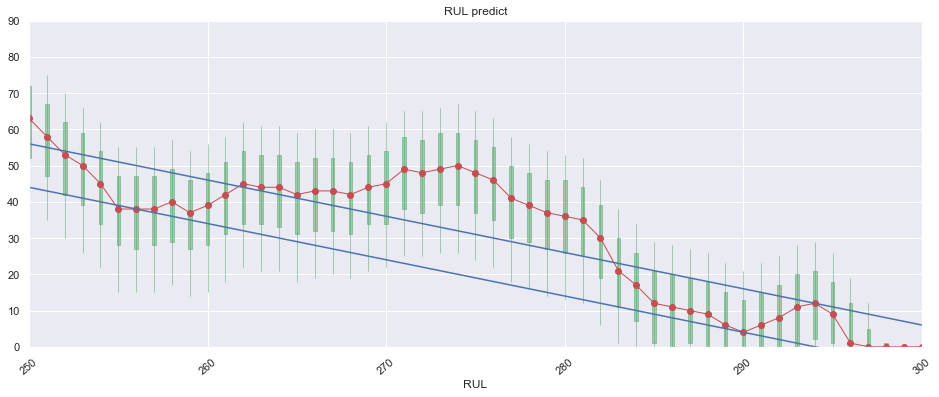

In [60]:
plotCandle(rul_df,  gs = None )
plt.plot(rul_df.num.values,rul_df.RUL_mu.values, "ro-", linewidth = 1)
plt.plot(rul_df.num.values,rul_df.RUL.values-6, "b-")
plt.plot(rul_df.num.values,rul_df.RUL.values+6, "b-")
plt.grid(True)
plt.xticks(rotation=40)
plt.title("RUL predict")
plt.axis([250,300,0,90])
plt.xlabel("time")
plt.xlabel("RUL")